# Analysis Report VIII
Identificando e removendo Outliers

## Loading dataset

In [1]:
# libs
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize = (14,6))

In [2]:
df_residential_prep = pd.read_csv('datasets/residential_prep.csv', sep=';')
print(df_residential_prep.shape)
df_residential_prep.head()

(23051, 11)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartmento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartmento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartmento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Apartmento


## Data outliers

<img src="assets/compressed_box-plot.png" alt="" width=70%>

### Valor

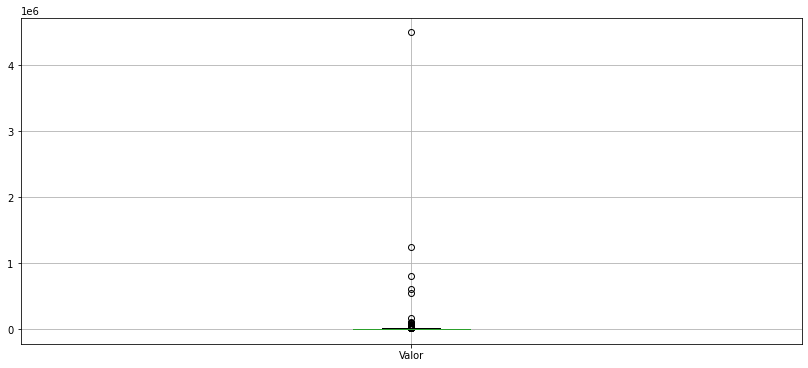

In [49]:
df_residential_prep.boxplot(['Valor'])

In [50]:
# boxplot statistcs
prices = df_residential_prep.Valor
Q1 = prices.quantile(.25)
Q3 = prices.quantile(.75)
IIQ = Q3 - Q1
minimum = Q1 - 1.5 * IIQ
maximum = Q3 + 1.5 * IIQ

print(
    f'Q1 = {Q1} \r\n'\
    f'Q3 = {Q3} \r\n'\
    f'IIQ = {IIQ} \r\n'\
    f'minimum = {minimum} \r\n'\
    f'maximum = {maximum}'
)

Q1 = 1550.0 
Q2 = 5400.0 
IIQ = 3850.0 
minimum = -4225.0 
maximum = 11175.0


In [51]:
# filtering data between max and min edges
mask = (df_residential_prep.Valor >= minimum) & (df_residential_prep.Valor <= maximum)
df_no_outliers_valor = df_residential_prep[mask]

df_no_outliers_valor.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartmento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartmento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartmento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Apartmento


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdbc4f3760>]],
      dtype=object)

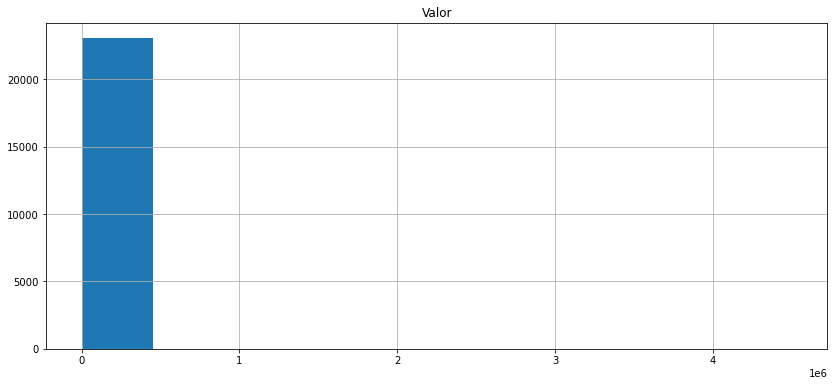

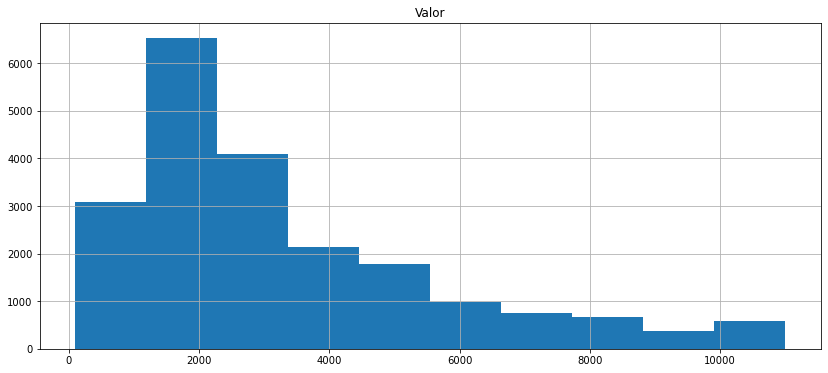

In [52]:
# analysing price frequency by ranges
df_residential_prep.hist(['Valor'])
df_no_outliers_valor.hist(['Valor'])

### Valor m2

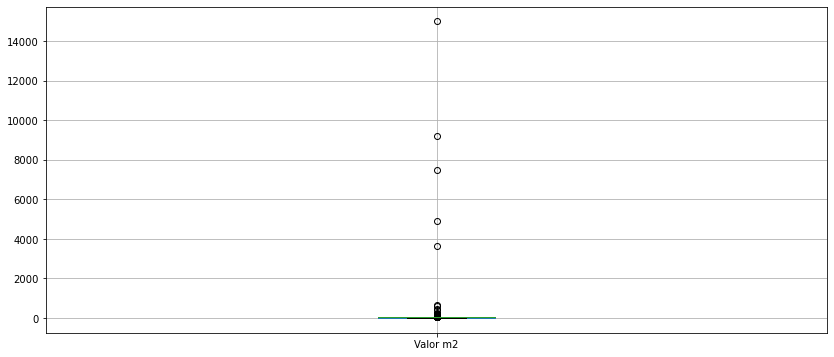

In [53]:
df_residential_prep.boxplot(['Valor m2'])

In [54]:
# boxplot statistcs
prices = df_residential_prep['Valor m2']
Q1 = prices.quantile(.25)
Q3 = prices.quantile(.75)
IIQ = Q3 - Q1
minimum = Q1 - 1.5 * IIQ
maximum = Q3 + 1.5 * IIQ

print(
    f'Q1 = {Q1} \r\n'\
    f'Q2 = {Q3} \r\n'\
    f'IIQ = {IIQ} \r\n'\
    f'minimum = {minimum} \r\n'\
    f'maximum = {maximum}'
)

Q1 = 21.05 
Q2 = 42.86 
IIQ = 21.81 
minimum = -11.664999999999996 
maximum = 75.57499999999999


In [55]:
# filtering data between max and min edges
mask = (df_residential_prep['Valor m2'] >= minimum) & (df_residential_prep['Valor m2'] <= maximum)
df_no_outliers_valor_m2 = df_residential_prep[mask]

df_no_outliers_valor_m2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartmento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartmento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartmento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Apartmento


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbda94c79a0>]],
      dtype=object)

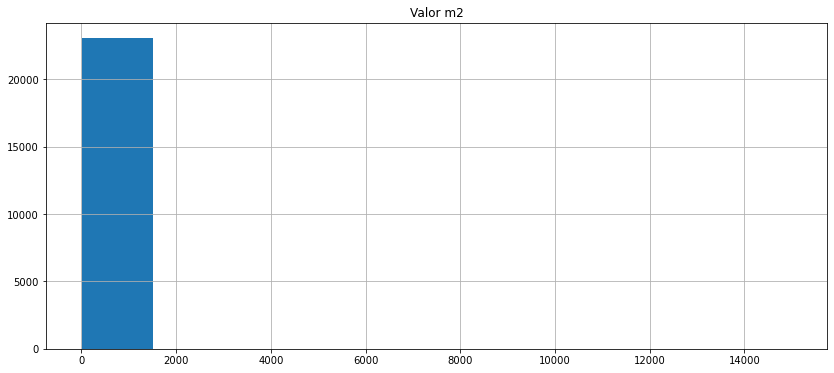

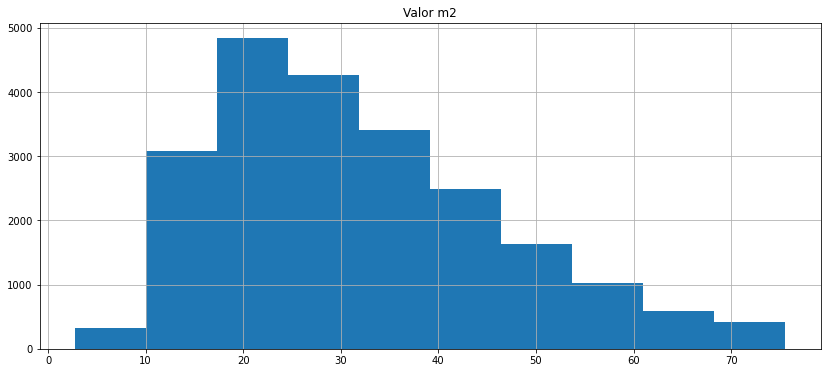

In [56]:
# analysing price frequency by ranges
df_residential_prep.hist(['Valor m2'])
df_no_outliers_valor_m2.hist(['Valor m2'])

### Limpando outliers de cada tipo de imóvel

/Users/gabrielbernardo/opt/anaconda3/envs/alura/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


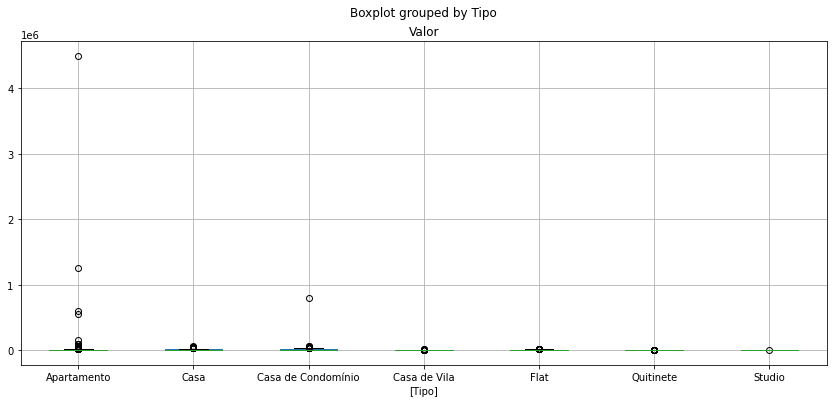

In [61]:
df_residential_prep.boxplot(['Valor'], by = ['Tipo'])

In [63]:
# grouping by type
grouped_types = df_residential_prep.groupby('Tipo')['Valor']

grouped_types.groups

{'Apartamento': [2, 3, 4, 5, 8, 9, 10, 11, 13, 16, 17, 18, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, ...], 'Casa': [1, 26, 58, 61, 101, 105, 153, 169, 191, 252, 264, 267, 278, 302, 326, 332, 350, 355, 373, 394, 401, 415, 441, 451, 492, 493, 499, 532, 565, 566, 591, 595, 596, 644, 647, 656, 662, 663, 688, 705, 729, 750, 754, 790, 801, 812, 891, 909, 976, 1025, 1074, 1082, 1168, 1173, 1175, 1208, 1230, 1305, 1312, 1376, 1395, 1410, 1433, 1478, 1492, 1496, 1508, 1513, 1540, 1543, 1557, 1658, 1678, 1734, 1740, 1744, 1751, 1764, 1791, 1799, 1847, 1900, 1925, 1966, 1997, 2026, 2035, 2053, 2117, 2137, 2154, 2174, 2201, 2207, 2208, 2235, 2274, 2306, 2309, 2316, ...], 'Ca

In [64]:
# boxplot statistcs
Q1 = grouped_types.quantile(.25)
Q3 = grouped_types.quantile(.75)
IIQ = Q3 - Q1
minimum = Q1 - 1.5 * IIQ
maximum = Q3 + 1.5 * IIQ

print(
    f'Q1 = {Q1} \r\n'\
    f'Q2 = {Q3} \r\n'\
    f'IIQ = {IIQ} \r\n'\
    f'minimum = {minimum} \r\n'\
    f'maximum = {maximum}'
)

Q1 = Tipo
Apartamento           1600.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Flat                  2500.0
Quitinete              900.0
Studio                1500.0
Name: Valor, dtype: float64 
Q2 = Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Flat                   6000.0
Quitinete              1500.0
Studio                 2450.0
Name: Valor, dtype: float64 
IIQ = Tipo
Apartamento            3400.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Flat                   3500.0
Quitinete               600.0
Studio                  950.0
Name: Valor, dtype: float64 
minimum = Tipo
Apartamento           -3500.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Flat                  -2750.0
Quitinete                 0.0
Studio                   75.0
Name: Valor, dtype: float64 
maxim

In [69]:
# filtering data between max and min limits for each type
df_no_outliers_tipo_valor = pd.DataFrame()

for r_type in grouped_types.groups.keys():
    is_type = df_residential_prep.Tipo == r_type
    is_betweeen_limits = (df_residential_prep['Valor'] >= minimum[r_type]) & (df_residential_prep['Valor'] <= maximum[r_type])
    
    mask = is_type & is_betweeen_limits
    df_temp = df_residential_prep[mask]
    
    df_no_outliers_tipo_valor = pd.concat([df_no_outliers_tipo_valor, df_temp])
    
df_no_outliers_tipo_valor.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartmento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartmento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Apartmento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartmento
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,33.33,Apartmento


/Users/gabrielbernardo/opt/anaconda3/envs/alura/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


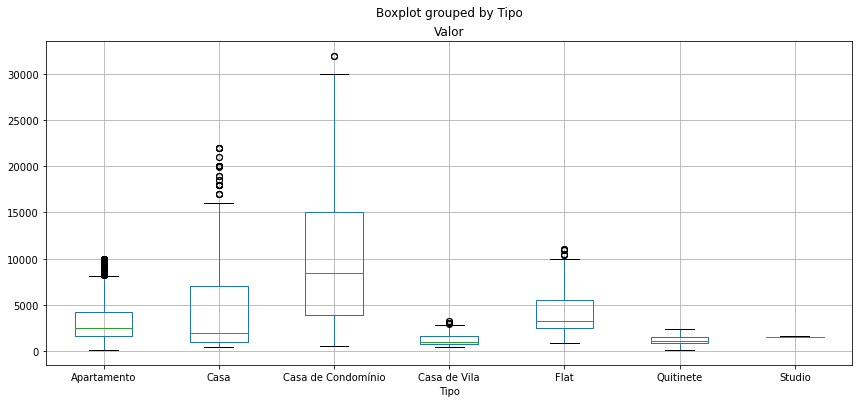

In [72]:
# analysing price boxplot by each type
df_no_outliers_tipo_valor.boxplot(['Valor'], by='Tipo')